IMPORTING NECESSARY LIBRARIES

In [33]:
import numpy as np
import pandas as pd
import nltk
import sklearn
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer,TweetTokenizer
from sklearn.model_selection import train_test_split
np.random.seed(12355)
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import ConfusionMatrixDisplay
from wordcloud import STOPWORDS

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nalinr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df_tweets=pd.read_csv("fifa_world_cup_2022_tweets.csv",index_col=1)
df_tweets.head() #the dataset loaded from csv files

,Unnamed: 0,Likes,Source of Tweet,Content,Sentiment
Tweet date,,,,,
2022-11-20 23:59:21+00:00,0,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
2022-11-20 23:59:01+00:00,1,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2022-11-20 23:58:41+00:00,2,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
2022-11-20 23:58:33+00:00,3,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
2022-11-20 23:58:28+00:00,4,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [5]:
df_tweets.groupby(df_tweets['Sentiment']).count()

,Unnamed: 0,Likes,Source of Tweet,Content
Sentiment,,,,
negative,5784,5784,5784,5784
neutral,8251,8251,8251,8251
positive,8489,8489,8489,8489


In [6]:
df_tweets.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22524 entries, 2022-11-20 23:59:21+00:00 to 2022-11-20 00:00:00+00:00
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Likes            22524 non-null  int64 
 1   Source of Tweet  22524 non-null  object
 2   Content          22524 non-null  object
 3   Sentiment        22524 non-null  object
dtypes: int64(1), object(3)
memory usage: 879.8+ KB


In [8]:
tweets=df_tweets.copy()

In [9]:
tweets_copy=tweets[tweets['Sentiment']!='neutral']
tweets_copy.head()

,Likes,Source of Tweet,Content,Sentiment
Tweet date,,,,
2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative
2022-11-20 23:57:32+00:00,0,Twitter for Android,"And like, will the mexican fans be able to scr...",negative


In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22524 entries, 2022-11-20 23:59:21+00:00 to 2022-11-20 00:00:00+00:00
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Likes            22524 non-null  int64 
 1   Source of Tweet  22524 non-null  object
 2   Content          22524 non-null  object
 3   Sentiment        22524 non-null  object
dtypes: int64(1), object(3)
memory usage: 879.8+ KB


In [11]:
stp_words=nltk.corpus.stopwords.words("english")

In [13]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
token_new=TweetTokenizer()
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token_new.tokenize)
text_counts = cv.fit_transform(tweets_copy['Content'])

In [14]:
print(text_counts)

  (0, 7612)	1
  (0, 5363)	1
  (0, 4097)	1
  (0, 20005)	1
  (0, 26103)	2
  (0, 4252)	2
  (0, 24072)	1
  (0, 11366)	1
  (0, 8983)	2
  (0, 20708)	1
  (0, 27255)	2
  (0, 27256)	2
  (0, 23543)	1
  (0, 21193)	1
  (0, 25108)	1
  (0, 9173)	1
  (0, 26624)	2
  (0, 9992)	2
  (0, 11097)	1
  (0, 4494)	1
  (0, 9002)	1
  (0, 24995)	1
  (0, 26218)	1
  (0, 8684)	1
  (0, 7310)	1
  :	:
  (14269, 11958)	1
  (14269, 11748)	1
  (14269, 828)	1
  (14270, 4097)	1
  (14270, 26624)	1
  (14270, 9992)	1
  (14270, 4582)	1
  (14271, 4097)	1
  (14271, 12468)	1
  (14271, 22927)	1
  (14271, 24602)	1
  (14271, 25306)	1
  (14271, 18172)	1
  (14272, 4097)	1
  (14272, 26987)	2
  (14272, 27242)	1
  (14272, 27249)	2
  (14272, 26878)	1
  (14272, 26912)	1
  (14272, 27212)	1
  (14272, 8718)	1
  (14272, 25857)	1
  (14272, 26268)	1
  (14272, 22901)	1
  (14272, 14367)	1


# BAG-OF-WORDS APPROACH

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, tweets_copy['Sentiment'], test_size=0.30, random_state=5)

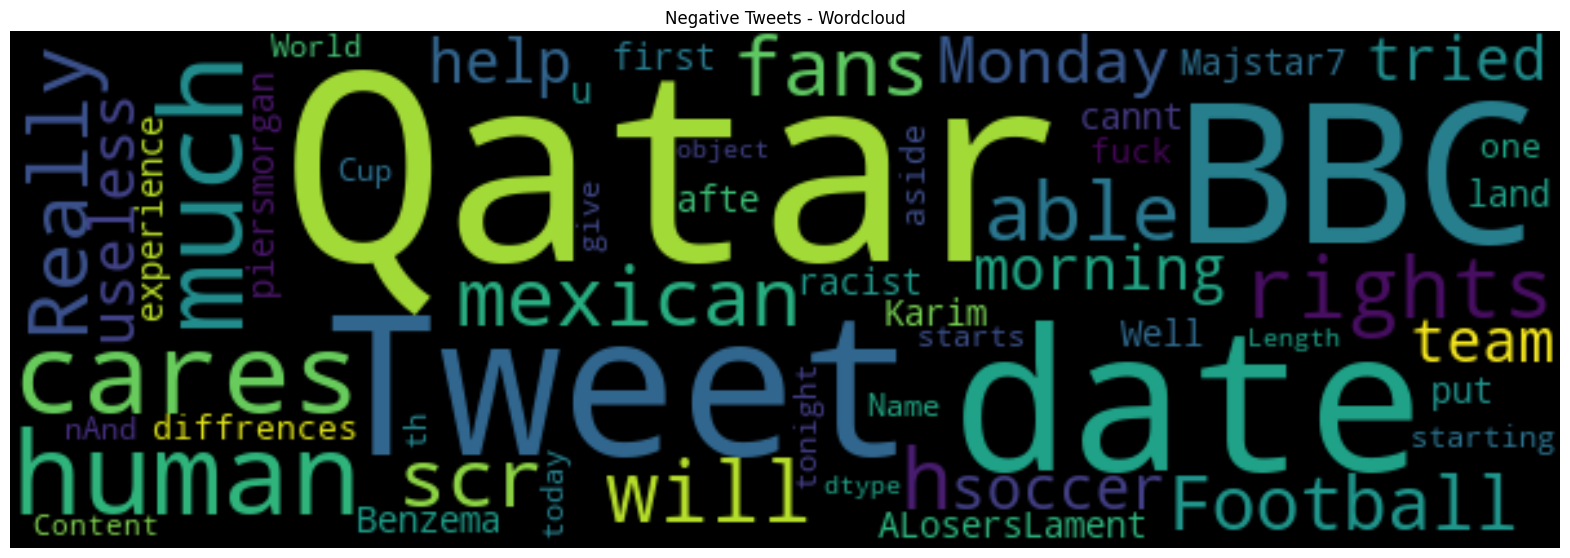

In [16]:
import matplotlib.pyplot as plt
neg_tweets = tweets_copy['Content'][tweets_copy["Sentiment"] == 'negative']
stop_words = ["https", "co", "RT", "WorldCup2022"] + list(STOPWORDS)
neg_wordcloud = WordCloud(width=600, height=200, background_color="black", stopwords = stop_words).generate(str(neg_tweets))
plt.figure(figsize=[20,10])
plt.title("Negative Tweets - Wordcloud")
plt.imshow(neg_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

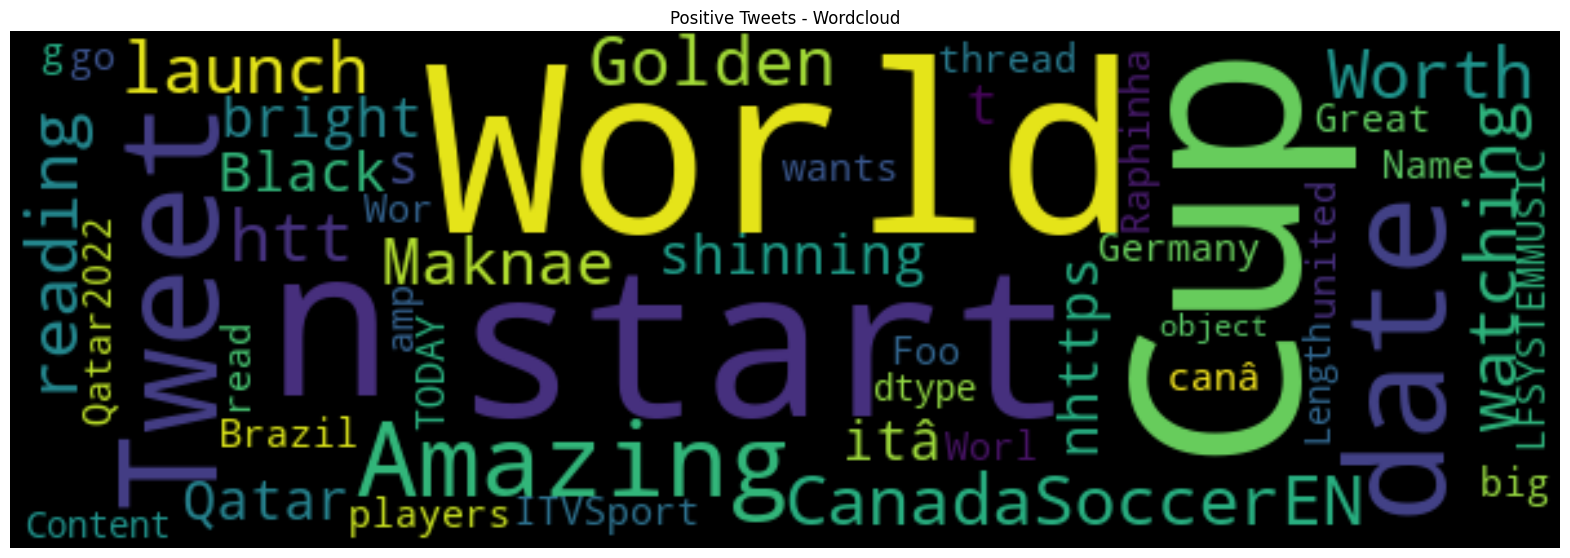

In [17]:

positive_tweets = tweets_copy['Content'][tweets_copy["Sentiment"] == 'positive']
stop_words = ["https", "co", "RT", "WorldCup2022"] + list(STOPWORDS)
positive_wordcloud = WordCloud(width=600, height=200, background_color="black", stopwords = stop_words).generate(str(positive_tweets))
plt.figure(figsize=[20,10])
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Multinomial Bayes Classifier

In [18]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)

In [19]:
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Train accuracy= ",MNB.score(X_train,Y_train))
print("Test accuracy_MNB= ",accuracy_score)

Train accuracy=  0.9144229806826144
Test accuracy_MNB=  0.8568425969173283


### Support Vector Machines Classifier

In [20]:
clf = svm.SVC()
clf.fit(X_train,Y_train)
predicted_svm=clf.predict(X_test)

In [21]:
accuracy_score_svm=metrics.accuracy_score(predicted_svm,Y_test)
print("Train accuracy= ",clf.score(X_train,Y_train))
print("Test accuracy_SVM: ",accuracy_score_svm)

Train accuracy=  0.9310379341407267
Test accuracy_SVM:  0.8552078468005605


### Random Forest Classifier

In [22]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
pred_rfc=rfc.predict(X_test)

In [23]:
accuracy_score_rfc=metrics.accuracy_score(pred_rfc,Y_test)
print("Train accuracy= ",rfc.score(X_train,Y_train))
print("Test accuracy_rfc: ",accuracy_score_rfc)

Train accuracy=  1.0
Test accuracy_rfc:  0.8519383465670247


# TF-IDF APPROACH 

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
X=tweets_copy['Content'].values
y=tweets_copy['Sentiment'].values

In [25]:
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()

# Splitting into training & test subsets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state = 0)

### Multinomial Bayes Classifier

In [26]:
clf_mnb = MultinomialNB()
clf_mnb.fit(x_train, y_train)
y_pred_mnb = clf_mnb.predict(x_test)

In [27]:
accuracy_score_clf_mnb=metrics.accuracy_score(y_pred_mnb,y_test)
print("Train accuracy= ",clf_mnb.score(x_train,y_train))
print("Test accuracy_clf_mnb: ",accuracy_score_clf_mnb)

Train accuracy=  0.9170253227905114
Test accuracy_clf_mnb:  0.889070527790752


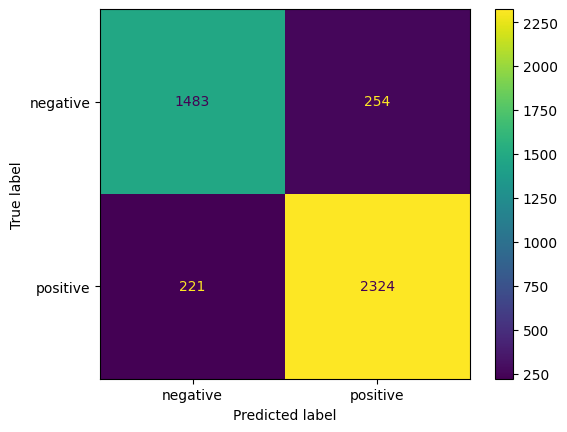

In [35]:
ConfusionMatrixDisplay.from_estimator(clf_mnb, x_test, y_test)

### Random Forest Classifier

In [28]:
clf_rfc=RandomForestClassifier()
clf_rfc.fit(x_train,y_train)
y_pred_clf=clf_rfc.predict(x_test)

In [29]:
accuracy_score_clf_rfc=metrics.accuracy_score(y_pred_clf,y_test)
print("Train accuracy= ",clf_rfc.score(x_train,y_train))
print("Test accuracy_clf_rfc: ",accuracy_score_clf_rfc)

Train accuracy=  0.9996997297567811
Test accuracy_clf_rfc:  0.8521718822979916


### Support Vector Machines Classifier

In [30]:
clf_svc = svm.SVC()
clf_svc.fit(x_train,y_train)
predicted_clf_svc=clf_svc.predict(x_test)

In [31]:
accuracy_score_clf_svc=metrics.accuracy_score(predicted_clf_svc,y_test)
print("Train accuracy= ",clf_svc.score(x_train,y_train))
print("Test accuracy_clf_mnb: ",accuracy_score_clf_svc)

Train accuracy=  0.9858872985687118
Test accuracy_clf_mnb:  0.8909388136384867


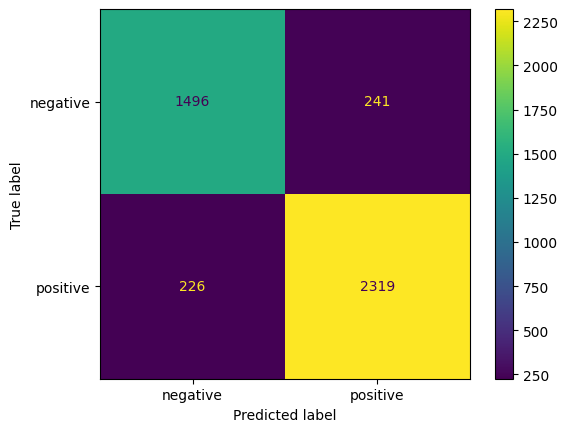

In [34]:
ConfusionMatrixDisplay.from_estimator(clf_svc, x_test, y_test)